# Support Vector Machines (SVM)

** SVMs are particularly well suited for classification of complex but small or medium sized datasets.**

## Linear SVM Classification

* An SVM classifier as fitting the widest possible street between the classes. This is called the large margin classification.

* Adding more training instances "off the street" will not affect the decision boundary at all: it is fully determined (or "supported") by the instances located on the edge of the street. These instances are called the **_support vectors_.**

* SVMs are sensitive to the feature scales.

## Soft Margin Classification

* If we strictly impose that all instances be off the street and on the right side, this is called hard margin classification.

* The hard margin classification only works if the data is linearly separable, and it is quite sensitive to the outliers.

* In sklearn's SVM classes, we can control the balance using the C hyperparameter: a smaller C value leads to a wider street but more margin violations.

In [6]:
import numpy as np
from sklearn import datasets
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import StandardScaler
from sklearn.svm import LinearSVC

iris = datasets.load_iris()
X = iris["data"][:, (2, 3)]
y = (iris["target"] == 2).astype(np.float64)

svm_clf = Pipeline((("scaler", StandardScaler()),
                   ("linear_svc", LinearSVC(C=1, loss="hinge"))))

svm_clf.fit(X, y)

Pipeline(steps=(('scaler', StandardScaler(copy=True, with_mean=True, with_std=True)), ('linear_svc', LinearSVC(C=1, class_weight=None, dual=True, fit_intercept=True,
     intercept_scaling=1, loss='hinge', max_iter=1000, multi_class='ovr',
     penalty='l2', random_state=None, tol=0.0001, verbose=0))))

In [7]:
svm_clf.predict([[5.5, 1.7]])

array([ 1.])

## Nonlinear SVM Classification

** One approach to handling nonlinear datasets is to add more features, such as polynomial features. **

In [18]:
from sklearn.datasets import make_moons
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import PolynomialFeatures

X_moons, y_moons = make_moons(n_samples=100, noise=0.15, random_state=42)

polynomial_svm_clf = Pipeline((("poly_features", PolynomialFeatures(degree=3)),
                              ("scaler", StandardScaler()),
                              ("svm_clf", LinearSVC(C=10, loss="hinge"))))

polynomial_svm_clf.fit(X_moons,y_moons)

Pipeline(steps=(('poly_features', PolynomialFeatures(degree=3, include_bias=True, interaction_only=False)), ('scaler', StandardScaler(copy=True, with_mean=True, with_std=True)), ('svm_clf', LinearSVC(C=10, class_weight=None, dual=True, fit_intercept=True,
     intercept_scaling=1, loss='hinge', max_iter=1000, multi_class='ovr',
     penalty='l2', random_state=None, tol=0.0001, verbose=0))))

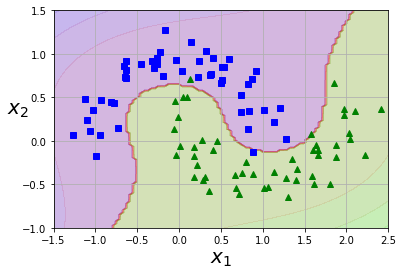

In [20]:
import matplotlib.pyplot as plt

def plot_dataset(X_moons, y_moons, axes):
    plt.plot(X_moons[:, 0][y_moons==0], X_moons[:, 1][y_moons==0], "bs")
    plt.plot(X_moons[:, 0][y_moons==1], X_moons[:, 1][y_moons==1], "g^")
    plt.axis(axes)
    plt.grid(True, which='both')
    plt.xlabel(r"$x_1$", fontsize=20)
    plt.ylabel(r"$x_2$", fontsize=20, rotation=0)
    

def plot_predictions(clf, axes):
    x0s = np.linspace(axes[0], axes[1], 100)
    x1s = np.linspace(axes[2], axes[3], 100)
    x0, x1 = np.meshgrid(x0s, x1s)
    X = np.c_[x0.ravel(), x1.ravel()]
    y_pred = clf.predict(X).reshape(x0.shape)
    y_decision = clf.decision_function(X).reshape(x0.shape)
    plt.contourf(x0, x1, y_pred, cmap=plt.cm.brg, alpha=0.2)
    plt.contourf(x0, x1, y_decision, cmap=plt.cm.brg, alpha=0.1)

plot_predictions(polynomial_svm_clf, [-1.5, 2.5, -1, 1.5])
plot_dataset(X_moons, y_moons, [-1.5, 2.5, -1, 1.5])

plt.show()

### Polynomial Kernel

** kernel trick makes it possible to get the same result as if we added many polynomial features, even with very high degree polynomials, without actually having to add them. **

In [21]:
from sklearn.svm import SVC
poly_kernel_svm_clf = Pipeline((("scaler", StandardScaler()),
                               ("svm_clf", SVC(kernel="poly", degree=3, coef0=1, C=5))))
poly_kernel_svm_clf.fit(X_moons, y_moons)

Pipeline(steps=(('scaler', StandardScaler(copy=True, with_mean=True, with_std=True)), ('svm_clf', SVC(C=5, cache_size=200, class_weight=None, coef0=1,
  decision_function_shape=None, degree=3, gamma='auto', kernel='poly',
  max_iter=-1, probability=False, random_state=None, shrinking=True,
  tol=0.001, verbose=False))))

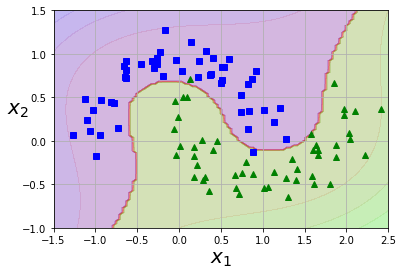

In [22]:
plot_predictions(poly_kernel_svm_clf, [-1.5, 2.5, -1, 1.5])
plot_dataset(X_moons, y_moons, [-1.5, 2.5, -1, 1.5])

plt.show()

* A common approch to find the right hyperparameter values is to use grid search.

### Adding Similarity Featrues

* Another technique to tackle nonlinear problems is to add features computed using a similarity function that measures how much each instance resembles a particular landmark.

* we select landmark at the location of each and every instance in the dataset. This creates many dimensions and thus increases the chances that the transformed traning set will be linearly separable.


### Gaussian RBF Kernel

* The similarity features method can be useful with any Machine Learning algorthm.


In [25]:
rbf_kernel_svm_clf = Pipeline((("scaler", StandardScaler()),
                              ("svm_clf", SVC(kernel="rbf", gamma=5, C=0.001))))

rbf_kernel_svm_clf.fit(X_moons, y_moons)

Pipeline(steps=(('scaler', StandardScaler(copy=True, with_mean=True, with_std=True)), ('svm_clf', SVC(C=0.001, cache_size=200, class_weight=None, coef0=0.0,
  decision_function_shape=None, degree=3, gamma=5, kernel='rbf',
  max_iter=-1, probability=False, random_state=None, shrinking=True,
  tol=0.001, verbose=False))))

** gamma acts like a regularization hyperparameter: if our model is overfitting, we should reduce it. (similar to the C hyperparameter)**

* As a rule of thumb, we should always try the linear kernel first( much faster).
* If the training set is not too large, we should try the Gaussian RBF kernel as well.

### Computational Complexity

* The LinearSVC class's training time complexity is roughly O(m×n).
* The SVC class's training time complexity is between O(m^2×n) and O(m^3×n).

## SVM Regression

* SVM Regression tries to fit as many instances as possible on the street while limiting margin violations.

* we can use Sklearn LinearSVR class to perform linear SVM Regression.

In [32]:
from sklearn.svm import LinearSVR

np.random.seed(42)
m=50
X = 2*np.random.rand(m,1)
y = (4 + 3 * X + np.random.randn(m, 1)).ravel()
svm_reg = LinearSVR(epsilon=1.5)
svm_reg.fit(X, y)

LinearSVR(C=1.0, dual=True, epsilon=1.5, fit_intercept=True,
     intercept_scaling=1.0, loss='epsilon_insensitive', max_iter=1000,
     random_state=None, tol=0.0001, verbose=0)

In [33]:
svm_reg1 = LinearSVR(epsilon=1.5, random_state=42)
svm_reg2 = LinearSVR(epsilon=0.5, random_state=42)
svm_reg1.fit(X, y)
svm_reg2.fit(X, y)

def find_support_vectors(svm_reg, X, y):
    y_pred = svm_reg.predict(X)
    off_margin = (np.abs(y - y_pred) >= svm_reg.epsilon)
    return np.argwhere(off_margin)

svm_reg1.support_ = find_support_vectors(svm_reg1, X, y)
svm_reg2.support_ = find_support_vectors(svm_reg2, X, y)

eps_x1 = 1
eps_y_pred = svm_reg1.predict([[eps_x1]])

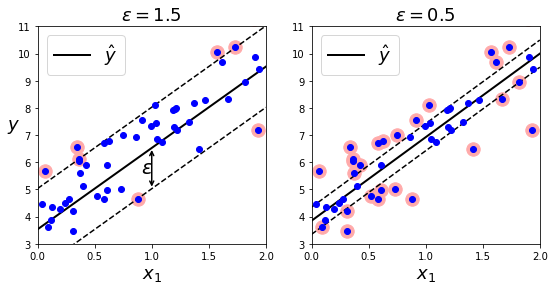

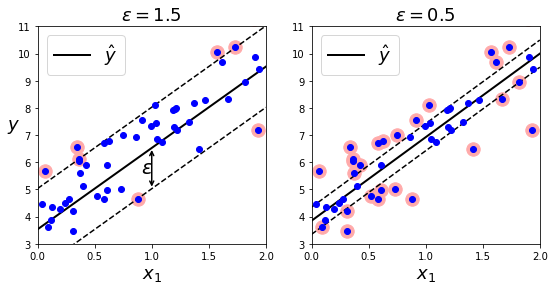

In [35]:
def plot_svm_regression(svm_reg, X, y, axes):
    x1s = np.linspace(axes[0], axes[1], 100).reshape(100, 1)
    y_pred = svm_reg.predict(x1s)
    plt.plot(x1s, y_pred, "k-", linewidth=2, label=r"$\hat{y}$")
    plt.plot(x1s, y_pred + svm_reg.epsilon, "k--")
    plt.plot(x1s, y_pred - svm_reg.epsilon, "k--")
    plt.scatter(X[svm_reg.support_], y[svm_reg.support_], s=180, facecolors='#FFAAAA')
    plt.plot(X, y, "bo")
    plt.xlabel(r"$x_1$", fontsize=18)
    plt.legend(loc="upper left", fontsize=18)
    plt.axis(axes)

plt.figure(figsize=(9, 4))
plt.subplot(121)
plot_svm_regression(svm_reg1, X, y, [0, 2, 3, 11])
plt.title(r"$\epsilon = {}$".format(svm_reg1.epsilon), fontsize=18)
plt.ylabel(r"$y$", fontsize=18, rotation=0)
#plt.plot([eps_x1, eps_x1], [eps_y_pred, eps_y_pred - svm_reg1.epsilon], "k-", linewidth=2)
plt.annotate(
        '', xy=(eps_x1, eps_y_pred), xycoords='data',
        xytext=(eps_x1, eps_y_pred - svm_reg1.epsilon),
        textcoords='data', arrowprops={'arrowstyle': '<->', 'linewidth': 1.5}
    )
plt.text(0.91, 5.6, r"$\epsilon$", fontsize=20)
plt.subplot(122)
plot_svm_regression(svm_reg2, X, y, [0, 2, 3, 11])
plt.title(r"$\epsilon = {}$".format(svm_reg2.epsilon), fontsize=18)
plt.show()

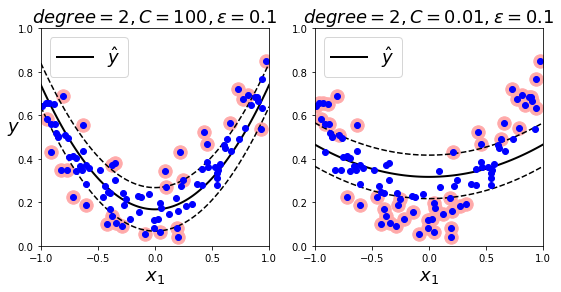

In [36]:
#To tackle nonlinear regression tasks, we can use kernelized SVM model.

from sklearn.svm import SVR

np.random.seed(42)
m = 100
X = 2 * np.random.rand(m, 1) - 1
y = (0.2 + 0.1 * X + 0.5 * X**2 + np.random.randn(m, 1)/10).ravel()

svm_poly_reg1 = SVR(kernel="poly", degree=2, C=100, epsilon=0.1)
svm_poly_reg2 = SVR(kernel="poly", degree=2, C=0.01, epsilon=0.1)
svm_poly_reg1.fit(X, y)
svm_poly_reg2.fit(X, y)

plt.figure(figsize=(9, 4))
plt.subplot(121)
plot_svm_regression(svm_poly_reg1, X, y, [-1, 1, 0, 1])
plt.title(r"$degree={}, C={}, \epsilon = {}$".format(svm_poly_reg1.degree, svm_poly_reg1.C, svm_poly_reg1.epsilon), fontsize=18)
plt.ylabel(r"$y$", fontsize=18, rotation=0)
plt.subplot(122)
plot_svm_regression(svm_poly_reg2, X, y, [-1, 1, 0, 1])
plt.title(r"$degree={}, C={}, \epsilon = {}$".format(svm_poly_reg2.degree, svm_poly_reg2.C, svm_poly_reg2.epsilon), fontsize=18)

plt.show()